### Student contributions

* Student `Dissanayake` has ...
* Student `Baykara` has ...

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 

In [3]:
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, StratifiedShuffleSplit

from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

## Loading Data

Notice that the shape of each pattern is given by a $32 \times 32 \times 1$ tensor. Thus, you may have to reshape it to either a matrix or a vector depending on the task you want to perform.

In [4]:
f_bnch = "mnist_32_32.bnch.joblib"
mnist = joblib.load(f_bnch)
print(mnist.keys())

print("data_shape: {0}".format(mnist['data'].shape))
print("data_test_shape: {0}".format(mnist['data_test'].shape))

dict_keys(['DESCR', 'target', 'target_test', 'data', 'data_test'])
data_shape: (60000, 1024)
data_test_shape: (10000, 1024)


In [5]:
mnist

{'DESCR': 'MNIST data set from Lecun site: http://yann.lecun.com/exdb/mnist/',
 'target': array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 'target_test': array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'data_test': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

## Data Exploration, Visualization and Correlations

Descriptive statistics, boxplots and histograms.

### Some examples

Plot 10 randomly chosen digit images as 5 x 2 subplots.

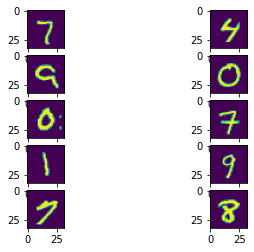

In [6]:
#code the plotting here
import random
f, axis = plt.subplots(5,2)
for i in range(5):
  rand = random.randint(0,len(mnist['data'][0]))
  rand2 = random.randint(0,len(mnist['data'][0]))

  axis[i,0].imshow(mnist['data'][rand].reshape(32,32))
  axis[i,1].imshow(mnist['data'][rand2].reshape(32,32))

plt.show()

In [7]:
mnist_reshaped = [a.reshape(32,32) for a in mnist['data']]


### Descriptive analysis

Build a DataFrame to make easier the exploratory analysis.

In [8]:
#define the DataFrame here

df = pd.DataFrame(mnist['data'])
df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_target= pd.DataFrame(mnist['target'])
df_target

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


Describe the basic statistics of the pixels on the positions in the range `[494 : 502]` of the reshaped patterns.:

In [10]:
#perform the description here

df_desc = df.iloc[:, list(range(494,503))]
df_desc.describe()



,494,495,496,497,498,499,500,501,502
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,86.867300,96.966550,111.371833,123.972067,129.806550,126.599550,108.880333,81.157633,55.225867
std,106.352823,108.717059,113.814008,111.606695,109.947771,112.149298,111.550601,104.694004,92.903764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,29.000000,64.000000,123.000000,141.000000,132.000000,64.000000,0.000000,0.000000
75%,211.000000,232.000000,252.000000,252.000000,252.000000,252.000000,251.000000,195.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [11]:
df_desc['target'] = mnist['target']
df_desc

<ipython-input-11-dd7fcfd21bb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desc['target'] = mnist['target']


,494,495,496,497,498,499,500,501,502,target
0,35,241,225,160,108,1,0,0,0,5
1,0,0,0,0,0,0,0,0,253,0
2,0,0,0,14,86,178,248,254,91,4
3,0,104,251,253,184,15,0,0,0,1
4,0,36,201,252,252,169,11,0,0,9
...,...,...,...,...,...,...,...,...,...,...
59995,8,188,253,253,245,140,4,0,0,8
59996,252,252,252,253,252,220,35,0,0,3
59997,253,248,147,148,91,2,0,0,0,5
59998,5,0,0,0,0,0,22,128,191,6


### Boxplots

Compute and display the boxplots of pixels in the range `[494 : 502]`.

<Axes: >

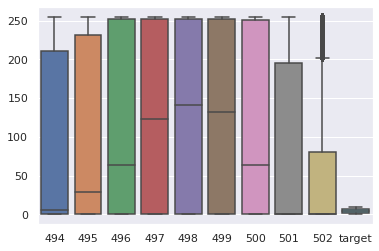

In [12]:
#code the boxplots here
import seaborn as sns
sns.set()
sns.boxplot(df_desc)


### Histograms and scatterplots

Plot pairplots and histograms over the previous pixel range using `sns.pairplot`.  
To do so select first two target digits (e.g., 2 and 7) and apply `pairplot` only on patterns from those two targets.

In [13]:
#select two target digits and apply sns.pairplot on the indicated pixel range

selected_targets = df_desc[(df_desc['target']==2) | (df_desc['target']==7)]
selected_targets

,494,495,496,497,498,499,500,501,502,target
5,0,110,121,122,121,202,252,194,3,2
15,0,0,0,17,90,240,252,194,67,7
16,0,0,0,0,7,215,254,128,0,2
25,125,250,253,253,253,245,171,33,0,2
28,0,0,0,0,0,16,253,253,253,2
...,...,...,...,...,...,...,...,...,...,...
59977,0,0,0,0,92,252,203,0,0,7
59983,0,0,0,0,0,0,0,25,202,2
59985,0,0,0,0,0,26,118,248,253,2
59988,0,0,0,0,37,165,253,253,206,7


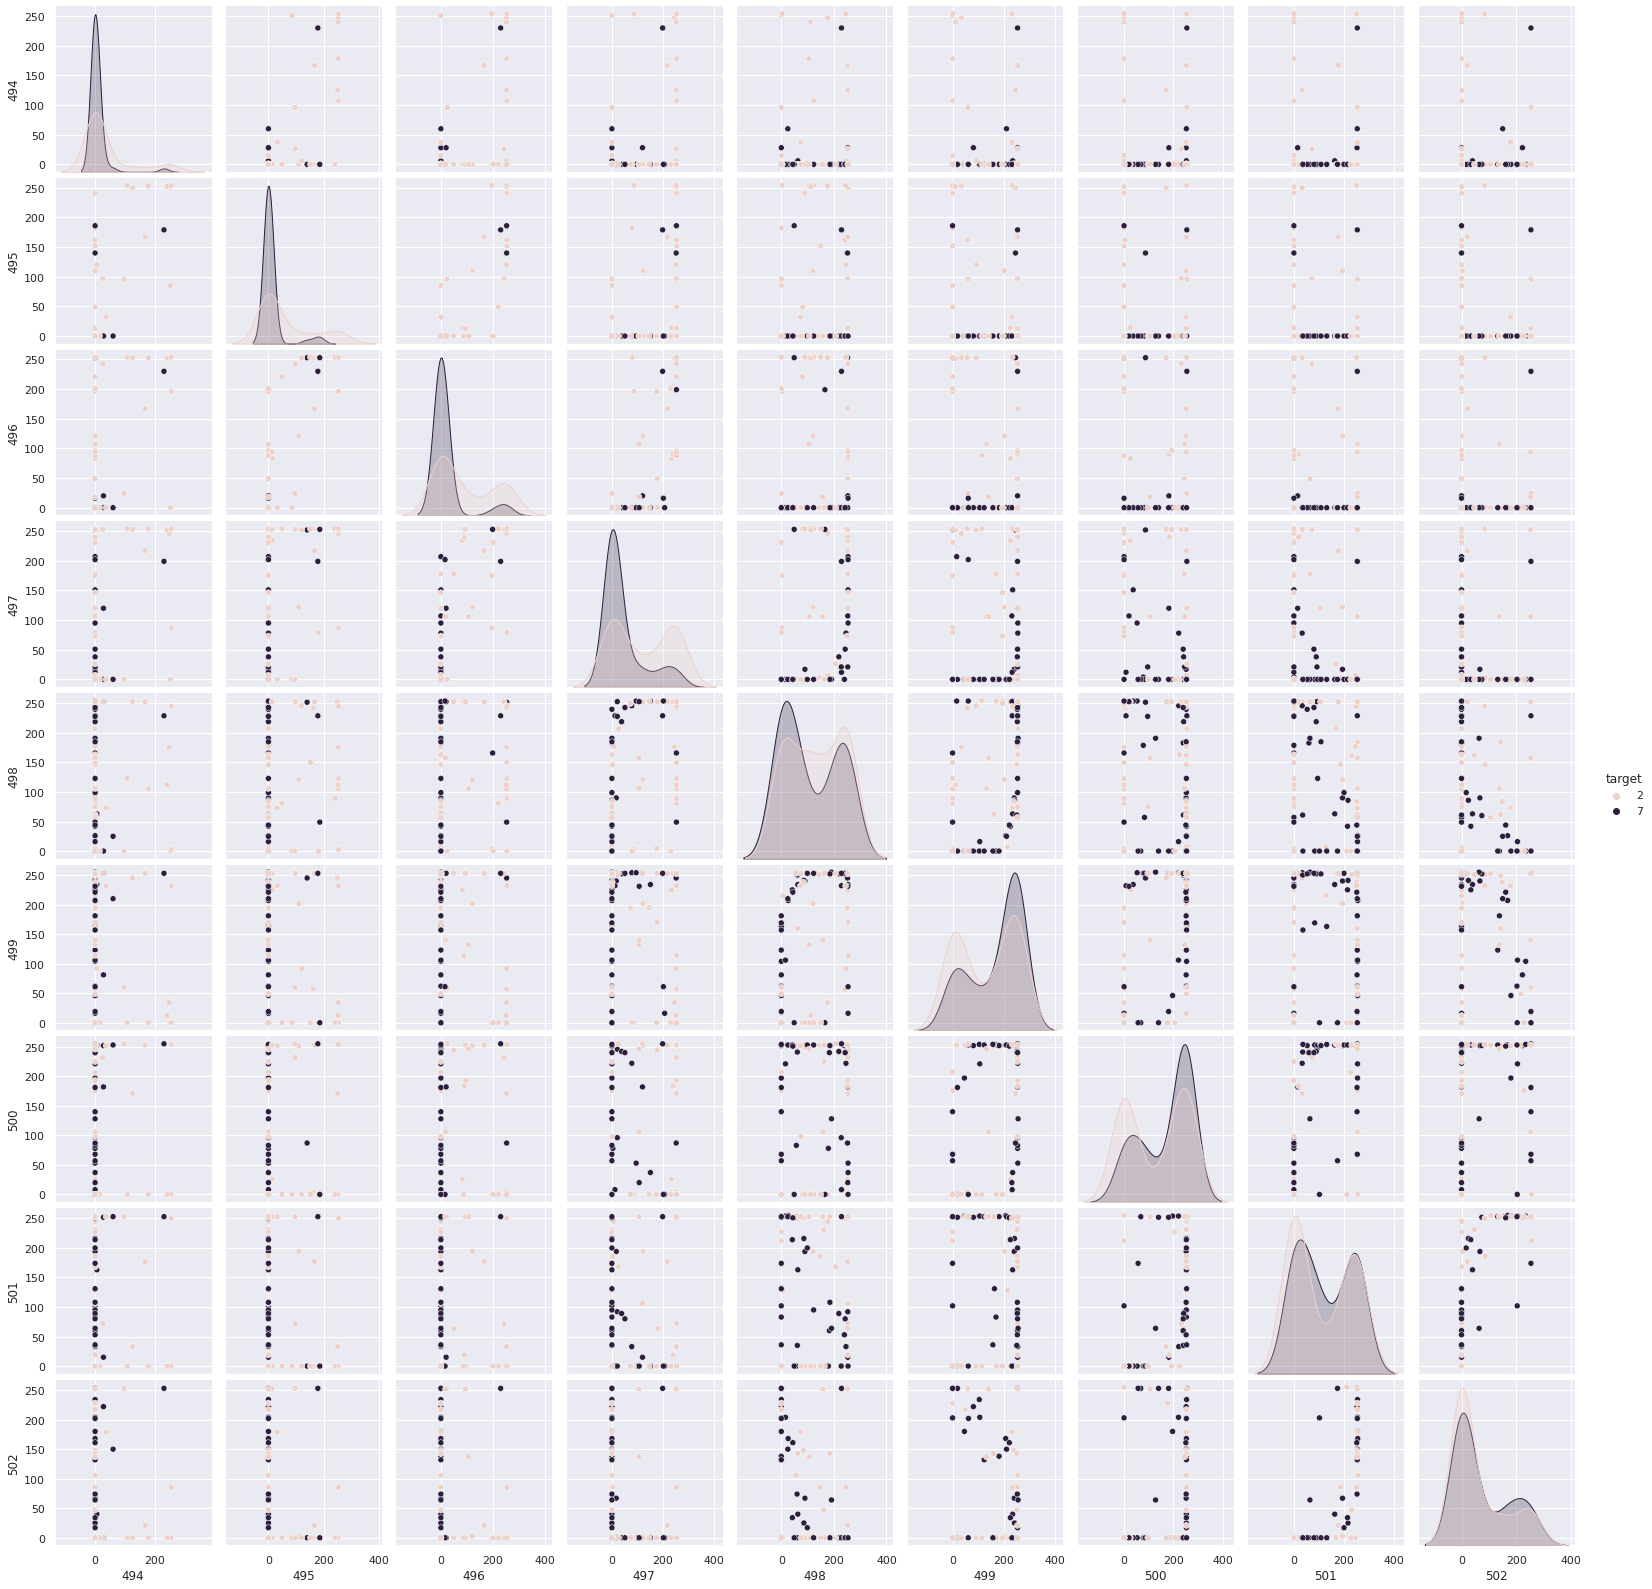

In [14]:
#we choose some features we expect to be meaningful
pair_plot = sns.pairplot(selected_targets[0:100], hue= 'target', diag_kind="kde", diag_kws=dict(fill=True))
plt.show()

In [19]:
df_desc = df_desc.drop(['target'],axis=1)

### Correlations

Use the previous pixel range but drop the `target` column.

Use directly a heatmap to display the correlations.

<ipython-input-20-f73c256048fd>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cMap = plt.cm.get_cmap("bwr",lut=n_colors )


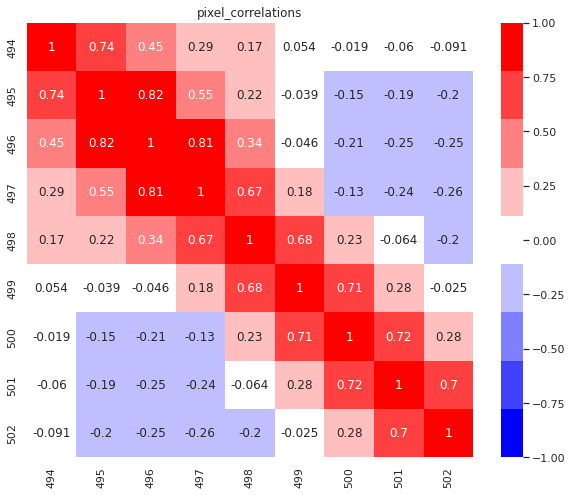

In [20]:
#display the correlations of the pixel range as a heatmap
#sns.heatmap(df_desc.corr())

n_colors = 9
cMap = plt.cm.get_cmap("bwr",lut=n_colors ) 

# define the heatmap
plt.figure( figsize=(10, 8))
plt.title('pixel_correlations')
h_map = sns.heatmap(df_desc.corr().values,
                    vmin=-1., vmax=1., 
                    cmap=cMap, 
                    annot=True, 
                    xticklabels=list(df_desc),
                    yticklabels=list(df_desc))
plt.xticks(rotation=90) 

# generate the heatmap
plt.show()


### Data Analysis Conclusions

Write down here a summary of your conclusions after the basic data analysis

A correlation matrix is a square matrix that shows the correlation coefficients between all possible pairs of variables in a given dataset. In the case of an image, each pixel can be considered a variable. The correlation coefficient measures the strength and direction of the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), and 0 indicating no correlation.

By computing the correlation matrix of an image, we can identify which pixels or regions are highly correlated, meaning they tend to change in the same way together.Accoridn to the results the red lines indicate a high degree of correlation between two variables. 

If there is a high correlation between two variables, the corresponding cell in the correlation matrix will have a value closer to 1 or -1. The intensity of the red color indicates the strength of the correlation, with darker shades of red indicating a higher correlation.

The red lines in a correlation matrix can be useful for identifying patterns or relationships in the data.


# Classiffiers

We are going to build a $k$-NN and an MLP classifier **over the test dataset**.  
But before working with any classifier, we split first the test dataset into a train-validation and a test subset.  
Use for this the class `StratifiedShuffleSplit` from scikit-learn. Set the `test_size` parameter to either `0.5` or `0.75`.

### Splitting the test dataset

In [21]:
#split the test dataset here
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
X = mnist['data']
y = mnist['target']


## k-NN Classification

> Girintili blok



### Grid Search of Optimal Number of neighbors

In [22]:
#define a knn classifier and use CV to estimate the best number of neighbors
param_grid = {'n_neighbors': np.arange(1, 11)}

# Perform grid search and fit KNN model
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X, y)

# Print best parameter and accuracy score
print("Best parameter: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


Best parameter:  {'n_neighbors': 3}
Best accuracy score:  0.9663666666666666


### Search Results 

We first examine the test scores of the 5 best hyperparameters.

In [23]:
#transfor the CV results into a DataFrame and display the 5 best results
cv_knn_df = pd.DataFrame()
cv_knn_df['Params'] = list(range(1,11))
cv_knn_df['Results'] = grid_search.cv_results_['mean_test_score']



In [24]:
cv_knn_df

,Params,Results
0,1,0.966127
1,2,0.958353
2,3,0.966367
3,4,0.964167
4,5,0.964847
5,6,0.963893
6,7,0.963440
7,8,0.962447
8,9,0.961840
9,10,0.960693


<Axes: xlabel='Params', ylabel='Results'>

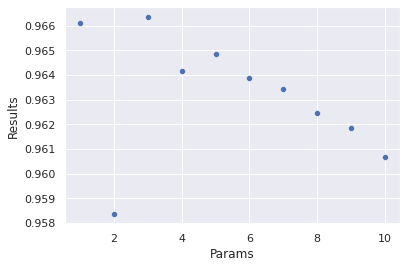

In [25]:
#plot the test scores that correspond to each number of neighbors
sns.scatterplot(cv_knn_df, x = 'Params',y='Results')

We analyze the CV results to check whether the CV ranges used are correct.

### Test Accuracy and Confusion Matrix

Precision and recall can also be defined for multiclass problems but we will skip them.

In [26]:
from sklearn import neighbors
#compute the test predictions, their accuracy and confusion matrix and discuss your results

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
pred = knn.predict(mnist['data_test'])
acc = accuracy_score(pred,mnist['target_test'])


In [27]:
acc

0.9705

In [28]:
conf_matrix =confusion_matrix(mnist['target_test'], pred)

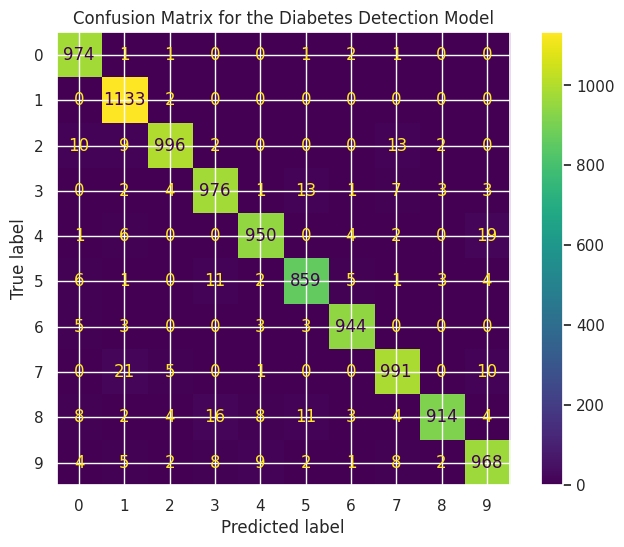

In [29]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);


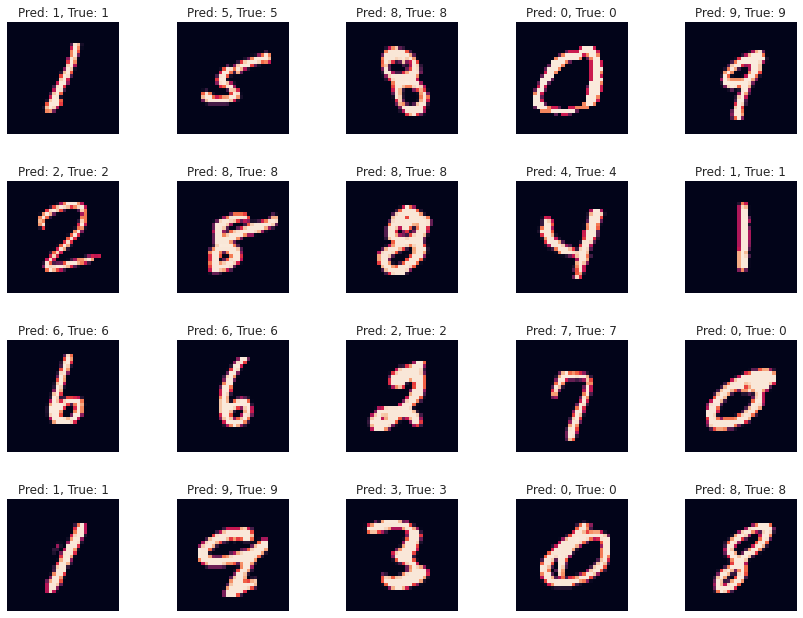

In [30]:
fig, ax = plt.subplots(nrows=4,ncols=5, figsize=(12,9),)
target_test = mnist['target_test']

for i in range(4):
  rand_list = [random.randrange(0,len(mnist['data_test'])) for x in range(5)]

  ax[i,0].imshow(mnist['data_test'][rand_list[0]].reshape(32,32))
  ax[i,0].set_title(f'Pred: {pred[rand_list[0]]}, True: {target_test[rand_list[0]]}')

  ax[i,1].imshow(mnist['data_test'][rand_list[1]].reshape(32,32))
  ax[i,1].set_title(f'Pred: {pred[rand_list[1]]}, True: {target_test[rand_list[1]]}')

  ax[i,2].imshow(mnist['data_test'][rand_list[2]].reshape(32,32))
  ax[i,2].set_title(f'Pred: {pred[rand_list[2]]}, True: {target_test[rand_list[2]]}')

  ax[i,3].imshow(mnist['data_test'][rand_list[3]].reshape(32,32))
  ax[i,3].set_title(f'Pred: {pred[rand_list[3]]}, True: {target_test[rand_list[3]]}')

  ax[i,4].imshow(mnist['data_test'][rand_list[4]].reshape(32,32))
  ax[i,4].set_title(f'Pred: {pred[rand_list[4]]}, True: {target_test[rand_list[4]]}')

fig.tight_layout(pad=1.0)
for ax in fig.axes:
    ax.axis('off')

plt.show()


### Conclusions on the $k$-NN classifier

Discuss your results here

By selecting an appropriate value for k and using a confusion metric, KNN can achieve high accuracy on the MNIST dataset, with reported accuracies of up to 97%.

However, KNN can be computationally expensive, especially for large datasets like MNIST. Additionally, KNN is sensitive to the choice of hyperparameters, such as the value of k and the distance metric, which can have a significant impact on the performance of the algorithm.the Euclidean distance metric is commonly used.

## MLP Classifier

### CV Hyperparametrization

Define an appropriate `MLPClassifier` and perform CV to select proper `alpha` and `hidden_layer_sizes` hyperparameters.

In [33]:
#define an appropriate MLP classifier and perform CV to select proper alpha and hidden_layer_sizes


mlp_classifier = Pipeline(steps=[('std_sc', StandardScaler()),
                                 ('mlpc', MLPClassifier(solver='adam', 
                                                        activation='relu',
                                                        tol=1.e-4, 
                                                        max_iter=2000,
                                                        warm_start=False,
                                                        shuffle=True))])

l_hidden_layer_sizes = [(20,), (20, 20)]
l_alpha = [10.**k for k in range(-6, 4)]

param_grid = {'mlpc__alpha': l_alpha, 'mlpc__hidden_layer_sizes': l_hidden_layer_sizes}

mlpc_gscv = GridSearchCV(mlp_classifier, 
                         param_grid=param_grid, 
                         cv=cv, 
                         scoring='accuracy', 
                         return_train_score=True, 
                         n_jobs=-1, 
                         verbose=1)

# t_0 = time.time() 
# _ = mlpc_gscv.fit(X, y)
# t_1 = time.time() 
# print("\nmlp_grid_search_time: {0:.2}m".format((t_1 - t_0)/60.))

# saving alpha_search in a pickle    
# joblib.dump(mlpc_gscv, 'mlp_classifier_gscv.joblib')

In [ ]:
mlpc_gscv.cv_results_

### Search Results 

We first examine the test scores of the 5 best hyperparameters.

We analyze the CV results to check whether the CV ranges used are correct.

best alpha: 1.000000	
alpha_min: 0.000001	alpha_max: 1000.000000
best_hidden_layer_sizes (20, 20) 
acc: 0.956


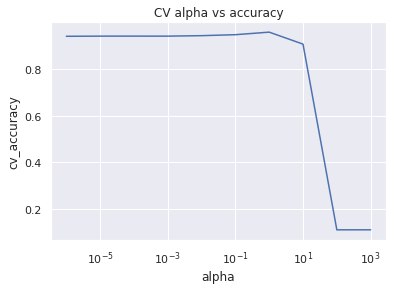

In [35]:
#plot the test scores that correspond to each alpha; do this only for the best MLP architecture found
mlpc_gscv = joblib.load('mlp_classifier_gscv.joblib')

best_alpha = mlpc_gscv.best_params_['mlpc__alpha'] 
print("best alpha: %.6f\t" % best_alpha)
print("alpha_min: %f\talpha_max: %f" % (np.array(l_alpha).min(), np.array(l_alpha).max()))

best_hidden_layer_sizes = mlpc_gscv.best_params_['mlpc__hidden_layer_sizes'] 
print("best_hidden_layer_sizes", best_hidden_layer_sizes, "\nacc: %.3f" % mlpc_gscv.best_score_) 

idx_best_hidden_layer_sizes = [tup == best_hidden_layer_sizes for tup in df_cv_estimator['param_mlpc__hidden_layer_sizes'].values]
idx_best_hidden_layer_sizes = np.array(idx_best_hidden_layer_sizes)

plt.title("CV alpha vs accuracy")
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("cv_accuracy")
_ = plt.plot( df_cv_estimator[idx_best_hidden_layer_sizes]['param_mlpc__alpha'], 
              df_cv_estimator[idx_best_hidden_layer_sizes]['mean_test_score'])

### Test MLPC Performance

We check the test accuracy and confusion matrix.

In [36]:
#compute the test predictions, their accuracy and confusion matrix and discuss your results
### CV accuracy, recall and precision of best model

mlp_classifier = Pipeline(steps=[('std_sc', StandardScaler()),
                                 ('mlpc', MLPClassifier(solver='adam', 
                                                        activation='relu',
                                                        tol=1.e-4,
                                                        hidden_layer_sizes=(20,20),
                                                        alpha=1,
                                                        max_iter=2000,
                                                        warm_start=False,
                                                        shuffle=True))])
mlp_classifier.fit(X,y)


Pipeline(steps=[('std_sc', StandardScaler()),
                ('mlpc',
                 MLPClassifier(alpha=1, hidden_layer_sizes=(20, 20),
                               max_iter=2000))])

In [37]:
pred = mlp_classifier.predict(mnist['data_test'])
acc = accuracy_score(pred,mnist['target_test'])
acc

0.9666

In [38]:
conf_matrix =confusion_matrix(mnist['target_test'], pred)

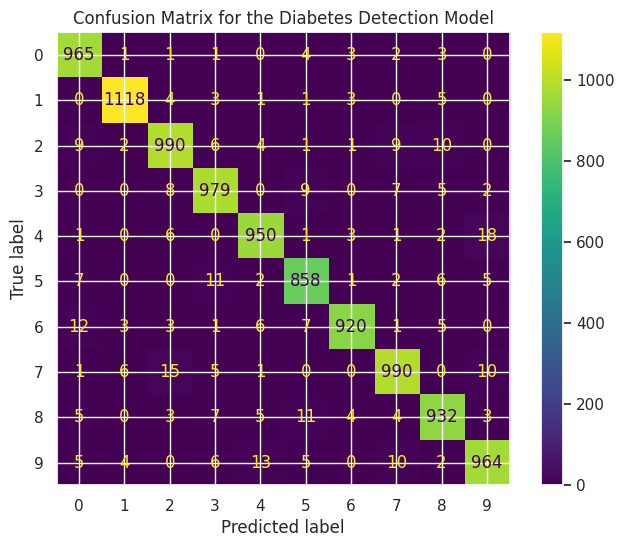

In [39]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=mlp_classifier.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);


### Conclusions on the MLP classifier

When using the MLP classifier on MNIST, it is important to choose appropriate hyperparameters, such as the number of hidden layers, the number of nodes in each layer, and the learning rate. These hyperparameters can significantly affect the performance of the classifier.

MLP has been shown to achieve very high accuracy on the MNIST dataset, with reported accuracies of up to 99.8%. Additionally, MLP can learn to recognize features and patterns in the data automatically, making it a powerful tool for image classification tasks.

(Intersetingly, in this case MLP got 0.9666 accuracy which mean lower than KNN classifier. will see why it happnes ?

### Predicting probabilities

We compute class probabilities over the test subset and pairplot them over the 10 classes.

In [40]:
#compute the test prediction probabilities, and pairplot them here

test_data = mnist['data_test']
test_data
pred_probs = mlp_classifier.predict_proba(test_data)
pred_probs

array([[2.30287945e-04, 2.30042324e-05, 4.43868316e-04, ...,
        9.95115670e-01, 6.60411309e-05, 4.49869206e-04],
       [2.63250000e-05, 6.18261656e-04, 9.96778756e-01, ...,
        2.18694383e-06, 6.13575222e-05, 3.75611254e-09],
       [1.29455948e-04, 9.80362659e-01, 6.80609356e-03, ...,
        7.86641669e-03, 1.80791682e-03, 1.32750741e-05],
       ...,
       [1.79139238e-07, 1.90749537e-05, 1.94767876e-06, ...,
        6.75821814e-04, 1.57231854e-04, 5.73553299e-03],
       [4.10580074e-05, 7.98188755e-05, 3.60804277e-06, ...,
        8.71728819e-06, 1.72648735e-02, 8.54156697e-05],
       [8.73133241e-05, 2.38654138e-06, 3.46668617e-05, ...,
        6.40330676e-09, 1.45830081e-06, 1.22558436e-08]])

In [41]:
df_probs = pd.DataFrame(pred_probs)
df_probs['target'] = mnist['target_test']
df_probs

,0,1,2,3,4,5,6,7,8,9,target
0,2.302879e-04,0.000023,0.000444,3.475933e-03,3.246781e-07,1.949619e-04,3.974835e-08,9.951157e-01,0.000066,4.498692e-04,7
1,2.632500e-05,0.000618,0.996779,2.464679e-03,2.139368e-07,6.534614e-07,4.756309e-05,2.186944e-06,0.000061,3.756113e-09,2
2,1.294559e-04,0.980363,0.006806,1.187601e-03,1.174486e-03,1.415445e-04,5.105510e-04,7.866417e-03,0.001808,1.327507e-05,1
3,9.881483e-01,0.000103,0.000288,7.529753e-05,1.720255e-06,4.368098e-04,3.843402e-04,1.047088e-02,0.000009,8.292465e-05,0
4,4.714481e-05,0.000051,0.000214,1.632969e-05,9.853781e-01,4.677392e-05,1.657301e-04,1.332373e-03,0.000060,1.268791e-02,4
...,...,...,...,...,...,...,...,...,...,...,...
9995,2.753184e-06,0.000016,0.999307,5.864322e-04,4.737096e-09,2.773267e-07,5.827419e-07,2.958489e-05,0.000057,2.217047e-09,2
9996,1.814142e-06,0.000005,0.000183,9.940121e-01,2.761762e-08,5.642998e-03,2.947235e-08,8.571759e-06,0.000092,5.462910e-05,3
9997,1.791392e-07,0.000019,0.000002,1.530801e-06,9.933993e-01,5.562414e-06,3.827420e-06,6.758218e-04,0.000157,5.735533e-03,4
9998,4.105801e-05,0.000080,0.000004,6.221577e-04,1.645906e-05,9.817720e-01,1.058648e-04,8.717288e-06,0.017265,8.541567e-05,5


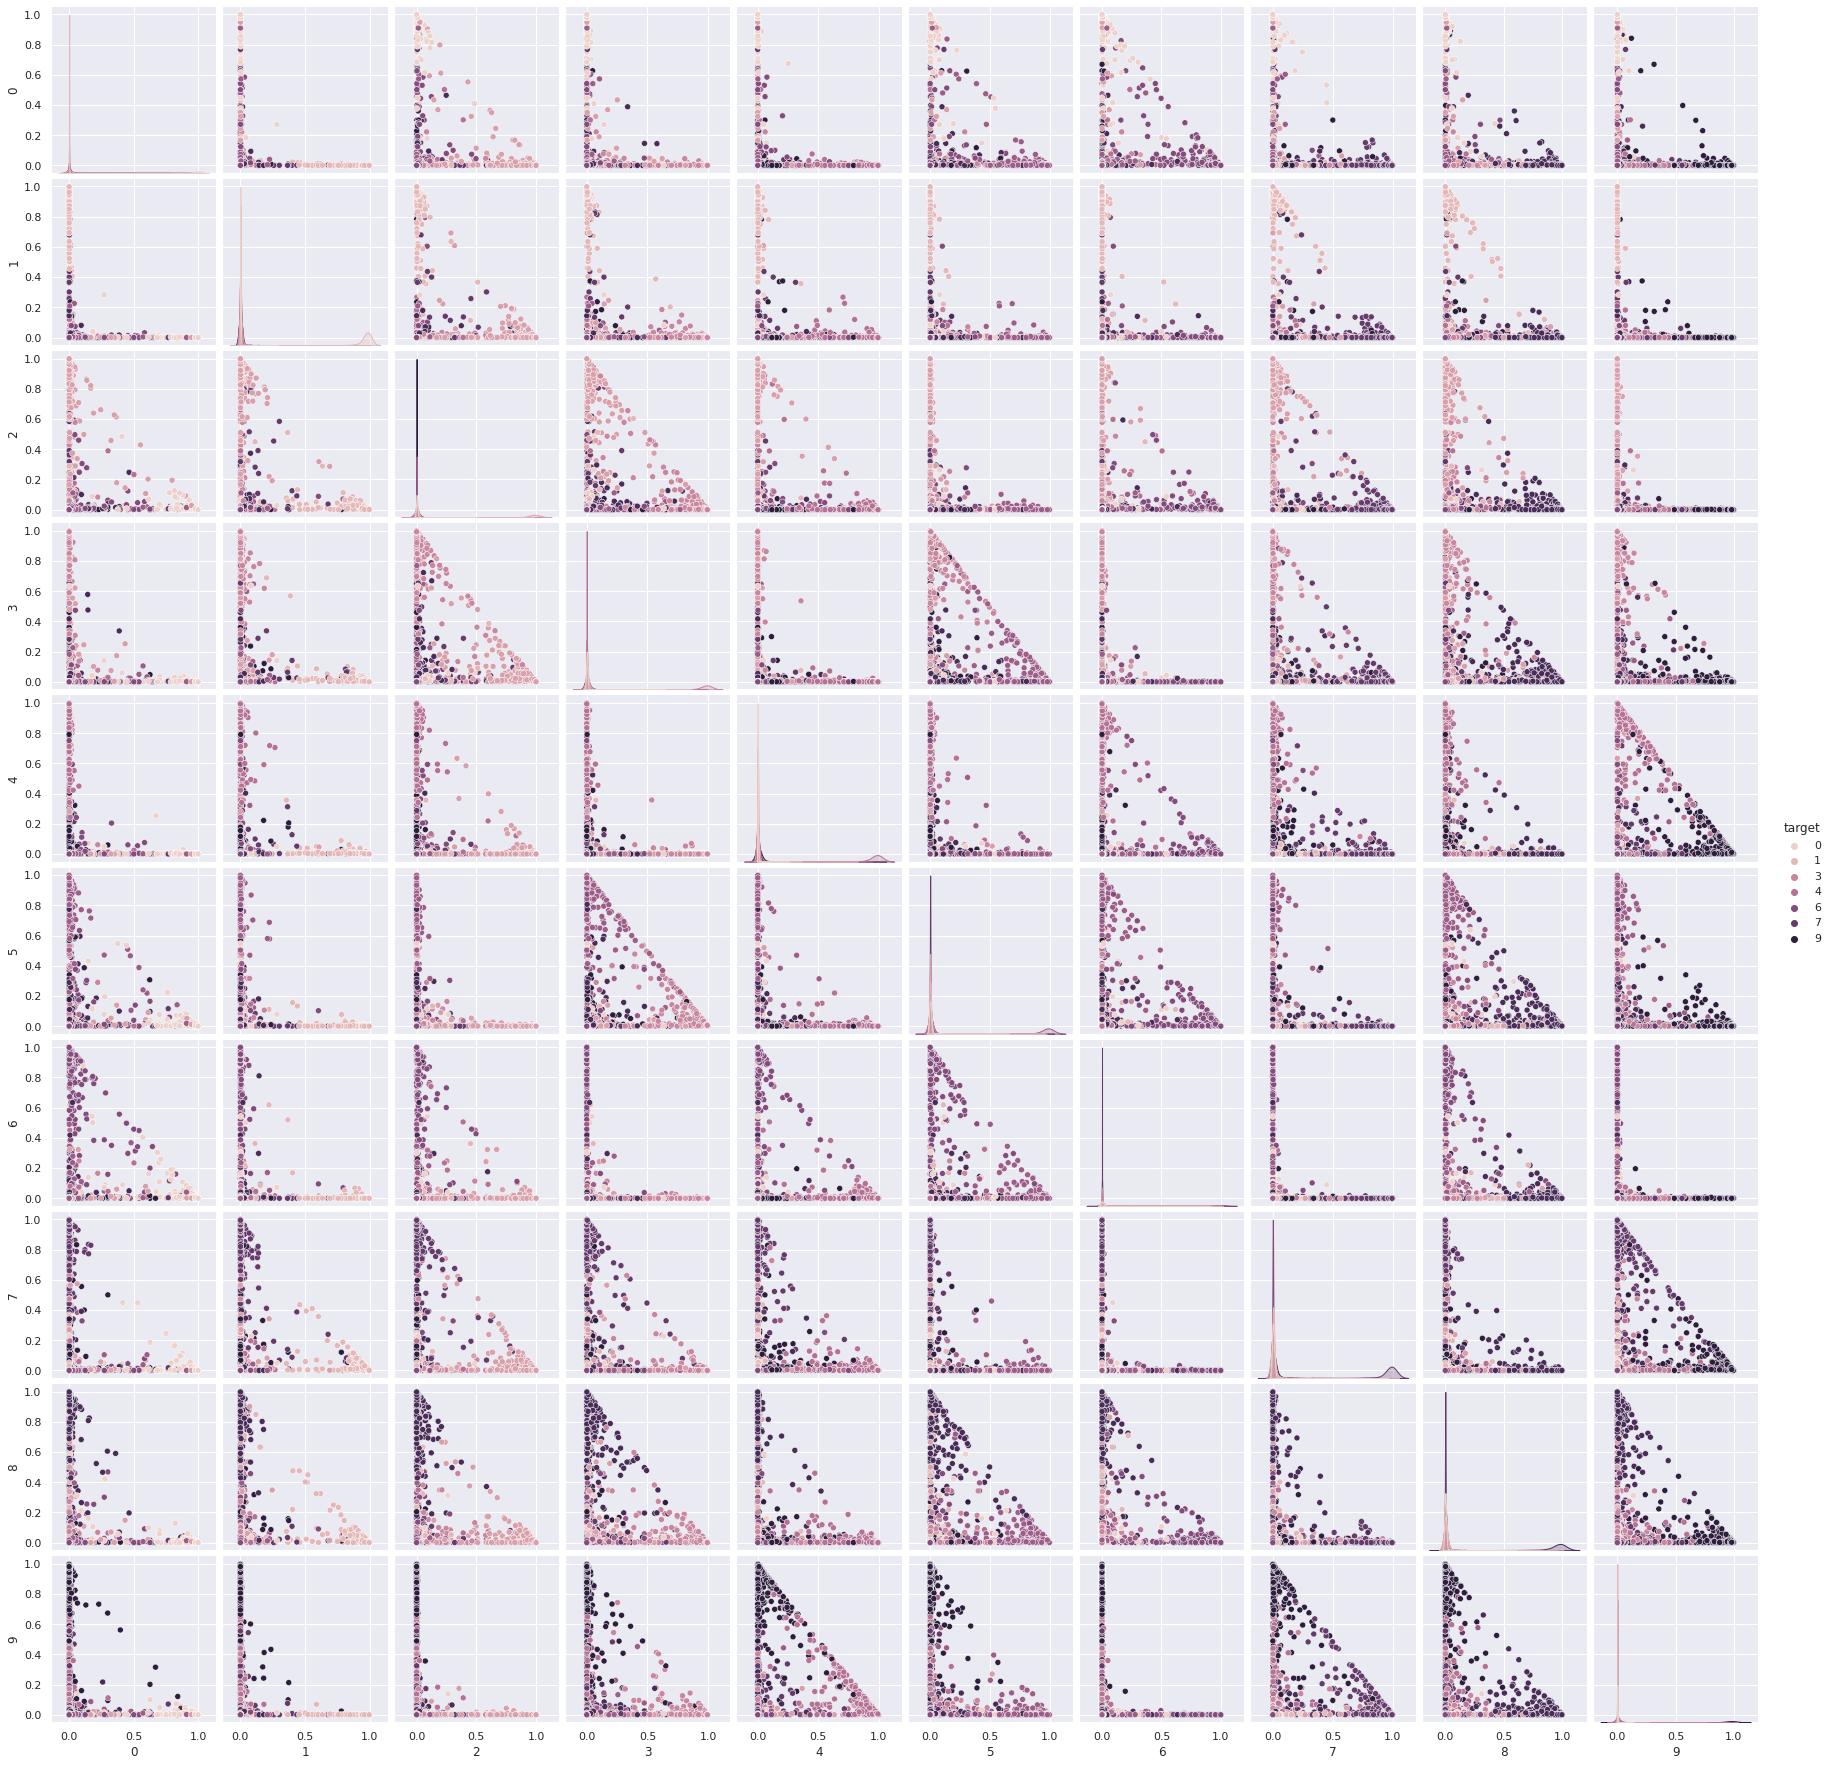

In [42]:
sns.pairplot(data=df_probs, hue='target')
plt.show()


### Conclusions on the probability pairplots

Probability pairplots show the joint distribution of two variables and the distribution of each variable individually. In the context of MNIST, probability pairplots can be used to explore the relationships between pixel values and the likelihood of a particular digit.



### What went wrong?

Probably your classification results are not very impressive.

As a first step to interpret them, find 10 cases of wrongly classified numbers, plot them and discuss your findings.  

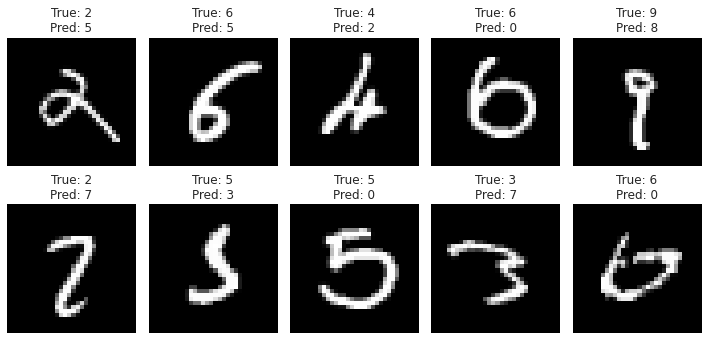

In [43]:
#find these examples and plot the images here
wrong_indices = np.where(pred != mnist['target_test'])[0]
select_indices = wrong_indices[:10]
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    index = select_indices[i]
    image = mnist['data_test'][index].reshape(32, 32)
    true_label = mnist['target_test'][index]
    pred_label = pred[index]
    ax.imshow(image, cmap='gray')
    ax.set_title(f'True: {true_label}\nPred: {pred_label}')
    ax.axis('off')
plt.tight_layout()
plt.show()



## How to improve your results?

MNIST is a relatively simple and well-structured dataset, with images of a fixed size and clear boundaries between digits. This means that KNN can perform well by simply comparing the pixel values of each image to its neighbors.

KNN can work well when there is a clear separation between classes in the feature space. In the case of MNIST, there may be distinct clusters of pixel values that correspond to different digits, making it easy for KNN to distinguish between them.

The value of k chosen for KNN can have a significant impact on its performance. It is possible that the value of k chosen for your experiment was optimal for the MNIST dataset, allowing KNN to achieve high accuracy.

MLP can be sensitive to the choice of hyperparameters, including the number of hidden layers, the number of nodes in each layer, and the learning rate. If these hyperparameters were not chosen optimally for the MNIST dataset, it is possible that MLP may not have performed as well as KNN.